# Encontro de equilíbrio em sistemas lineares utilizando autovalores e autovetores

Neste projeto, utilizaremos conceitos de álgebra linear para resolver um problema de equilíbrio em sistemas lineares.

## Conceitos utilizados

Sistemas lineares que variam com o tempo podem ser representados por matrizes, da forma 
$$ 
x_t = A \cdot x_{t-1} 
$$ 
onde A é a matriz que representa a mudança do sistema, $x_t$ a população no tempo t e $x_{t-1}$ a população no tempo t-1.

Considerando duas populações, a variação é dada pela derivada de suas funções. Imaginemos uma população de raposas e uma população de coelhos. Temos que suas variações podem ser dadas por:
$$
\frac{dR}{dt} = 1R
$$
$$
\frac{dC}{dt} = 3C - 1R
$$

Podemos imaginar vários estados iniciais das populações, para verificar como elas evoluem ao longo do tempo.
Vamos imaginar 3 casos, em que as populações de raposas e coelhos começam com (10,10), (10,2) e (0,3). Substituindo esses valores na fórmula que resulta na variação instantânea, teremos as seguintes direções (desconsiderando a intensidade dos vetores):

$$
\frac{dR}{dt} = 1 \cdot 10 = 10
$$

$$
\frac{dR}{dt} = 3 \cdot 10 - 1 \cdot 10 = 20
$$

$$
\frac{dR}{dt} = 1 \cdot 10 = 10
$$

$$
\frac{dR}{dt} = 3 \cdot 2 - 1 \cdot 10 = -4
$$

$$
\frac{dR}{dt} = 1 \cdot 0 = 0
$$

$$
\frac{dR}{dt} = 3 \cdot 3 - 1 \cdot 0 = 9
$$

Representando esses vetores no plano xy, com x sendo a dimensão dos coelhos e y a dimensão das raposas, teremos


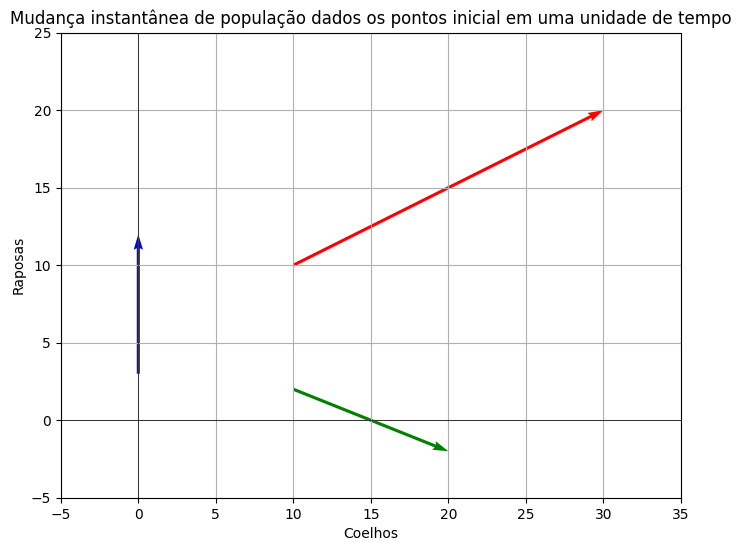

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Vetores definidos como linhas (cada vetor será uma linha 2D)
vetores = np.array([[20, 10], [10, -4], [0, 9]])

# Pontos iniciais para cada vetor
origens = np.array([
    [10, 10],    # Origem do primeiro vetor
    [10, 2],  # Origem do segundo vetor
    [0, 3]   # Origem do terceiro vetor
])

# Criação do gráfico
plt.figure(figsize=(8, 8))

# Plota cada vetor com seu ponto de origem correspondente
plt.quiver(
    origens[:, 0],    # X dos pontos de origem
    origens[:, 1],    # Y dos pontos de origem
    vetores[:, 0],    # Componente U (no eixo X)
    vetores[:, 1],    # Componente V (no eixo Y)
    angles='xy',
    scale_units='xy',
    scale=1,
    color=['r', 'g', 'b'],  # Cores diferentes para cada vetor
    width=0.005            # Largura das setas 
)

# Define os limites dos eixos
plt.xlim(-5, 35)
plt.ylim(-5, 25)

# Título e rótulos dos eixos
plt.title("Mudança instantânea de população dados os pontos inicial em uma unidade de tempo")
plt.xlabel("Coelhos")
plt.ylabel("Raposas")

# Exibir o grid e as linhas dos eixos
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Ajusta a proporção dos eixos para ser igual
plt.gca().set_aspect('equal', adjustable='box')

# Exibir o gráfico
plt.show()




Agora aplicando para vários pontos, conseguimos vizualizar como seria a variação de ambas as populações dadas diferentes populações iniciais. Com isso, obtemos um campo vetorial, que é o seguinte:

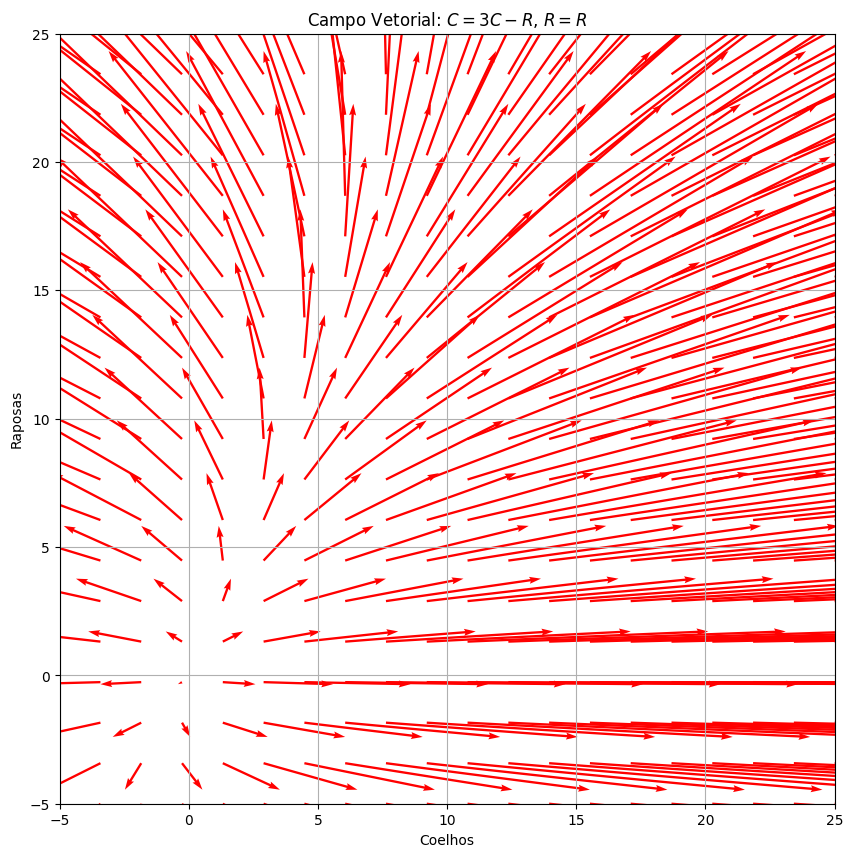

In [4]:
# Função que define o campo vetorial
def campo_vetorial(X, Y):
    # Equações para os vetores
    U = 3*X - Y   # Componente x do vetor
    V = Y         # Componente y do vetor
    return U, V

# Criação de uma grade de pontos (X, Y)
x = np.linspace(-5, 25, 20)  # Definindo os valores de x
y = np.linspace(-5, 25, 20)  # Definindo os valores de y
X, Y = np.meshgrid(x, y)    # Criando uma grade de coordenadas (X, Y)

# Obtendo as componentes do campo vetorial em cada ponto da grade
U, V = campo_vetorial(X, Y)

# Plotando o campo vetorial com quiver
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, scale=100, color='r')
plt.xlim([-5, 25])
plt.ylim([-5, 25])
plt.xlabel('Coelhos')
plt.ylabel('Raposas')
plt.title('Campo Vetorial: $C = 3C - R$, $R = R$')
plt.grid(True)
plt.show()


Agora, podemos visualizar como as populações evoluiriam ao longo do tempo de acordo com seus estados iniciais. O seguinte código gera uma visualização:

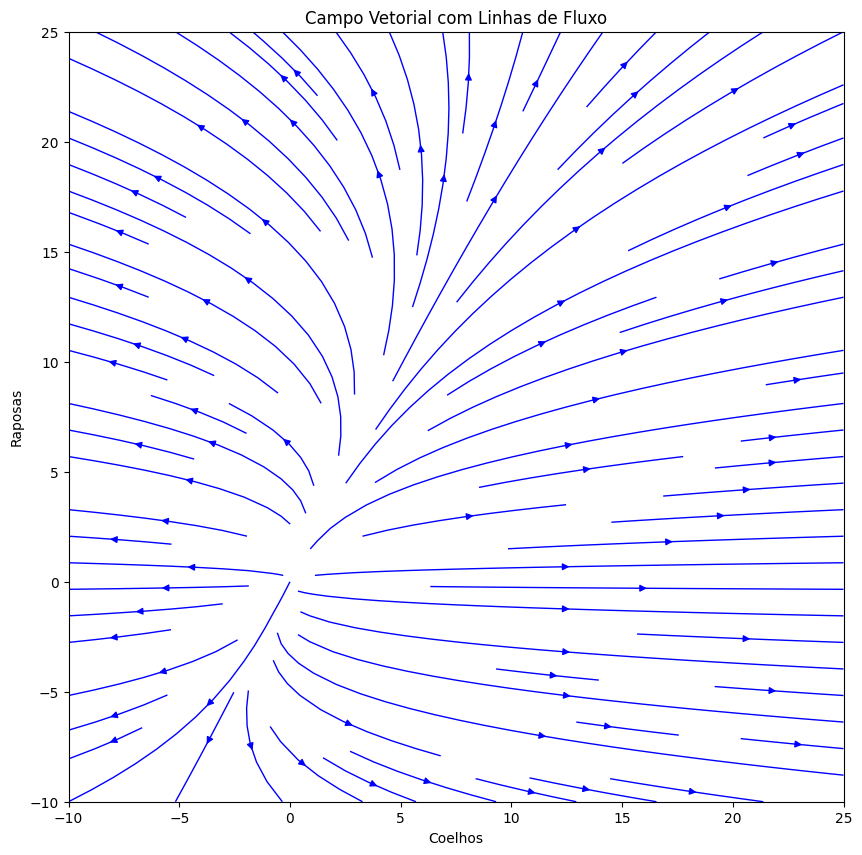

In [99]:
# Função que define o campo vetorial
def campo_vetorial(X, Y):
    # Definindo as equações para x e y
    U = 3*X - Y     # componente em x
    V = Y           # componente em y
    return U, V

# Criar uma grade de pontos (X, Y)
x = np.linspace(-10, 25, 20)
y = np.linspace(-10, 25, 20)
X, Y = np.meshgrid(x, y)

# Calcular as componentes do campo vetorial em cada ponto
U, V = campo_vetorial(X, Y)

# Plotando o campo vetorial com streamplot (linhas de fluxo)
plt.figure(figsize=(10, 10))
plt.streamplot(X, Y, U, V, color='b', linewidth=1)

# Títulos e rótulos
plt.title("Campo Vetorial com Linhas de Fluxo")
plt.xlabel('Coelhos')
plt.ylabel('Raposas')

# Exibindo o gráfico
plt.show()


**O que são autovetores?**

Autovetores de uma matriz $A$ são vetores não nulos que, ao serem transformados por essa matriz, resultam em um vetor proporcional a si mesmos. Em outras palavras, existe um escalar $\lambda$ (chamado de autovalor) tal que:

$$A x = \lambda x$$

Essa relação mostra que $x$ não muda sua direção quando multiplicado por $A$, apenas é "esticado" ou "encolhido" pelo fator $\lambda$.

**Aplicações em sistemas dinâmicos**

Em sistemas dinâmicos, autovalores e autovetores fornecem informações sobre a estabilidade e o comportamento de longo prazo. Ao analisá-los, é possível identificar direções em que o sistema permanece em equilíbrio ou evolui de maneira previsível.

Por exemplo, considere o sistema no qual C e R representam o estado atual da população enquanto C'e R' denotam o próximo estado do sistema:

$$
\begin{pmatrix} C' \\ R' \end{pmatrix} 
= \begin{pmatrix} 3 & -1 \\ 0 & 1 \end{pmatrix} 
\begin{pmatrix} C \\ R \end{pmatrix}.
$$

Encontrar os autovalores e autovetores da matriz $\begin{pmatrix} 3 & -1 \\ 0 & 1 \end{pmatrix}$ ajuda a entender sob quais condições as proporções entre as populações $C$ e $R$ se mantêm constantes ou seguem um padrão de evolução bem definido.


In [100]:
# Definindo a matriz
A = np.array([[3, -1], [0, 1]])

# Calculando os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

# Exibindo os resultados
print("Autovalores:", autovalores)
print("Autovetores:")
print(autovetores)


Autovalores: [3. 1.]
Autovetores:
[[1.         0.4472136 ]
 [0.         0.89442719]]


Percebemos que os dois autovalores são 3 e 1, ou seja, quando a população inicial é um múltiplo do autovetor $\mathbf{v_1}$, os valores são multiplicados por 3, e quando a população inicial é um múltiplo do vetor $\mathbf{v_2}$, a população é multiplicada por 1. Em ambos os casos, o equilíbrio do sistema é mantido. Podemos plotar as duas linhas nas direções desses dois autovetores:



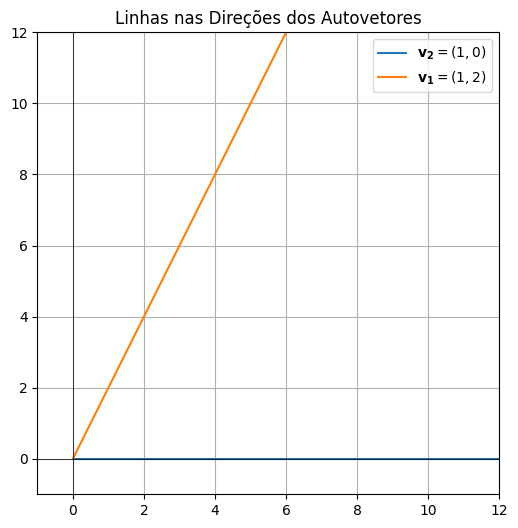

In [101]:
# Definindo o intervalo para a linha
t = np.linspace(0, 15, 100)  # Linha que vai de 0 a 15

# Vetores diretores
v1 = np.array([1, 0])  # Direção do vetor (1, 0)
v2 = np.array([1, 2])  # Direção do vetor (1, 2)

# Criando as linhas a partir de (0,0)
linha1 = np.outer(t, v1)  # Multiplicando para estender a linha
linha2 = np.outer(t, v2)

# Plotando
plt.figure(figsize=(6,6))
plt.plot(linha1[:, 0], linha1[:, 1], label=r'$\mathbf{v_2} = (1, 0)$')
plt.plot(linha2[:, 0], linha2[:, 1], label=r'$\mathbf{v_1} = (1, 2)$')

# Adicionando rótulos
plt.xlim(-1, 12)
plt.ylim(-1, 12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Exibindo a legenda
plt.legend()

#Exibindo título
plt.title('Linhas nas Direções dos Autovetores')

# Exibindo o gráfico
plt.show()


O autovetor $\mathbf{v_2} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$ divide a região em duas subregiões. Desconsiderando o espaço em que x < 0 ou y < 0 (populações negativas não fazem sentido nesse caso), essas subregiões são onde não existe equilíbrio entre as duas populações, ou seja, ou a população de raposas cresce mais rápido, ou a de coelhos.


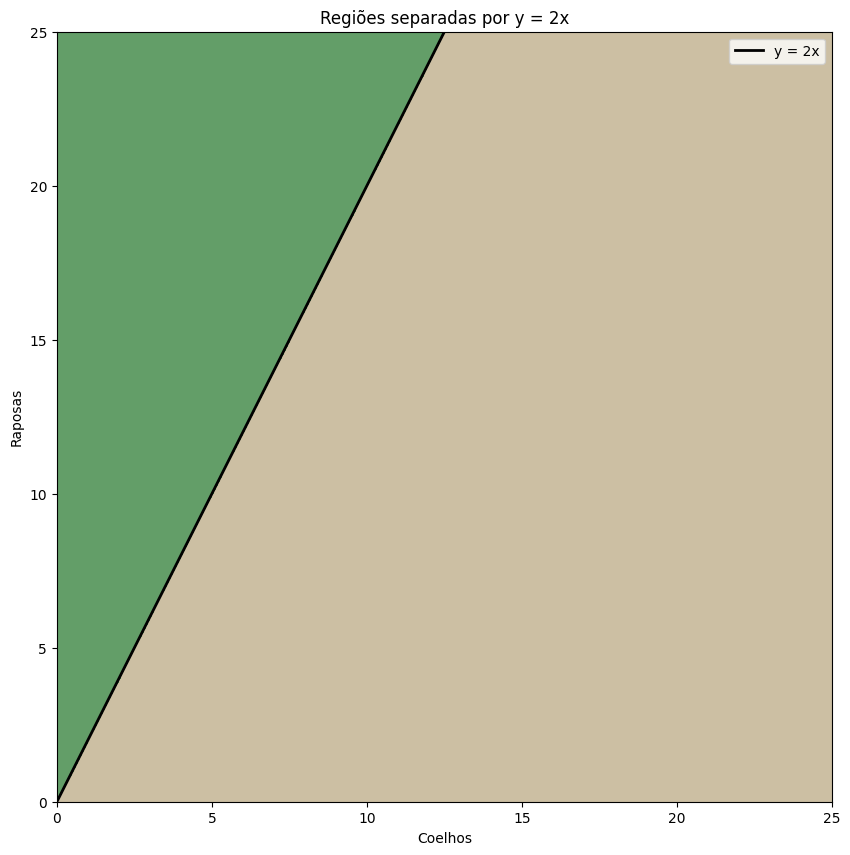

In [102]:
# Definir a área do gráfico
x = np.linspace(0, 25, 400)
y = np.linspace(0, 25, 400)

# Criar a grade de pontos
X, Y = np.meshgrid(x, y)

# Definir a linha de separação y = 2x
region_1 = Y < 2*X  # Região onde y < 2x
region_2 = Y >= 2*X  # Região onde y >= 2x

# Plotar as regiões
plt.figure(figsize=(10, 10))

# Pintar a região abaixo da linha y = 2x (vermelho)
plt.contourf(X, Y, region_1, cmap="Reds", alpha=0.7)

# Pintar a região acima da linha y = 2x (verde)
plt.contourf(X, Y, region_2, cmap="Greens", alpha=0.7)

# Adicionar linha y = 2x
plt.plot(x, 2*x, label="y = 2x", color="black", linewidth=2)

# Definir limites dos eixos
plt.xlim(0, 25)
plt.ylim(0, 25)

# Títulos e rótulos
plt.title('Regiões separadas por y = 2x')
plt.xlabel('Coelhos')
plt.ylabel('Raposas')

# Mostrar a legenda
plt.legend()

# Exibir o gráfico
plt.show()


A região preenchida pela cor verde é a região em que a população de raposas cresce mais rapidamente que a de coelhos, e a região em bege é aquela em que a população de coelhos cresce mais rapidamente que a de raposas.

Agora imaginando que o problema envolva mais uma dimensão, vamos pensar na introdução de caçadores no problema.
A população de coelhos manterá a mesma variação anterior, mas as raposas e os caçadores terão as seguintes variações:

$$
\frac{dR}{dt} = 2R - 1H
$$

$$
\frac{dH}{dt} = 1H
$$

sendo $\frac{dH}{dt}$ a variação da população de caçadores (hunters).

Agora imaginando 3 populações (na ordem raposas, coelhos e caçadores) iniciais de (5,3,2), (4,9,7) e (3,3,3), teremos os seguintes valores:
$$
\frac{dR}{dt} = 2.5 - 1.2 = 8; \frac{dC}{dt} = 3.3 - 1.5 = 4; \frac{dH}{dt} = 1.2 = 2
$$

$$
\frac{dR}{dt} = 2.4 - 1.7 = 1; \frac{dC}{dt} = 3.9 - 1.4 = 23; \frac{dH}{dt} = 1.7 = 7
$$

$$
\frac{dR}{dt} = 2.3 - 1.3 = 3; \frac{dC}{dt} = 3.3 - 1.3 = 6; \frac{dH}{dt} = 1.3 = 3
$$

Colocando os vetores (8,4,2), (1,23,7) e (3,6,3) no plano xyz, temos:






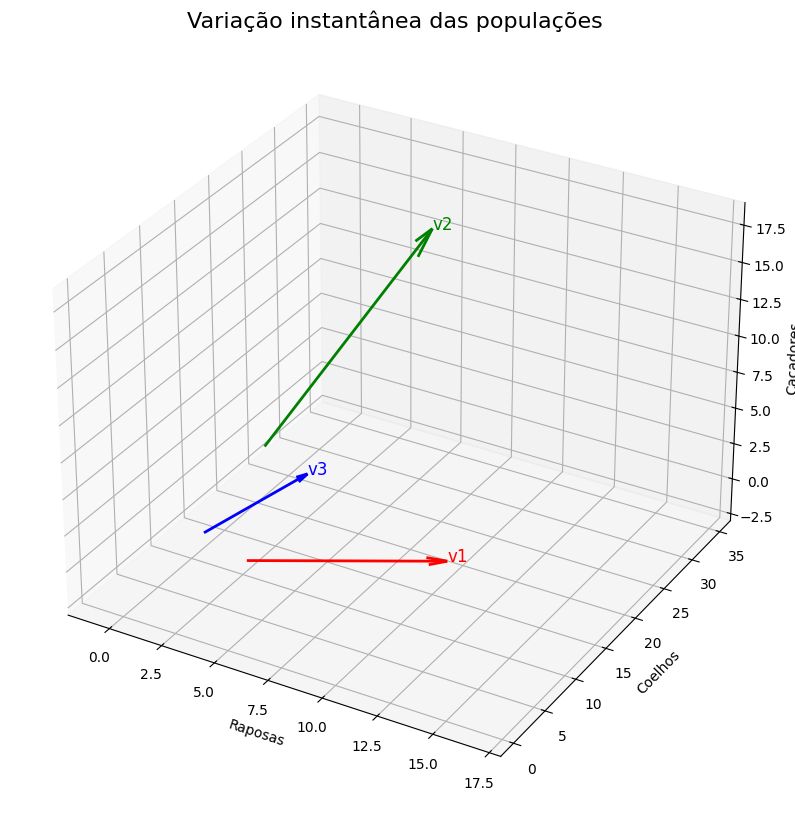

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo os pontos de origem dos vetores
origins = np.array([
    [5, 3, 2],  # Origem do vetor v1
    [4, 9, 7],  # Origem do vetor v2
    [3, 3, 3]   # Origem do vetor v3
])

# Definindo os vetores
vectors = np.array([
    [8, 4, 2],   # Vetor v1
    [1, 23, 7],  # Vetor v2
    [3, 6, 3]    # Vetor v3
])

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Cores para diferenciar os vetores
colors = ['r', 'g', 'b']

# Plotando cada vetor
for i in range(len(origins)):
    origin = origins[i]
    vector = vectors[i]
    ax.quiver(
        origin[0], origin[1], origin[2],        # Origem do vetor
        vector[0], vector[1], vector[2],        # Componentes do vetor
        color=colors[i],                        # Cor do vetor
        arrow_length_ratio=0.1,                  # Tamanho da cabeça da seta
        linewidth=2
    )
    # Opcional: Adicionar rótulos para cada vetor
    ax.text(
        origin[0] + vector[0], 
        origin[1] + vector[1], 
        origin[2] + vector[2],
        f'v{i+1}',
        color=colors[i],
        fontsize=12
    )

# Ajustando os limites dos eixos
all_points = np.vstack((origins, origins + vectors))
x_min, x_max = all_points[:,0].min() - 5, all_points[:,0].max() + 5
y_min, y_max = all_points[:,1].min() - 5, all_points[:,1].max() + 5
z_min, z_max = all_points[:,2].min() - 5, all_points[:,2].max() + 5

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

# Adicionando rótulos aos eixos
ax.set_xlabel('Raposas', fontsize=10)
ax.set_ylabel('Coelhos', fontsize=10)
ax.set_zlabel('Caçadores', fontsize=10)

# Título do gráfico
ax.set_title('Variação instantânea das populações', fontsize=16)

# Adicionando uma grade para melhor visualização
ax.grid(True)

# Mostrando o gráfico
plt.show()



Agora consatruindo o campo vetorial, assim como realizado para o problema com duas dimensões, temos:

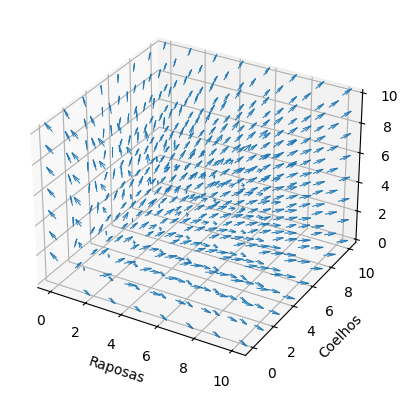

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir o intervalo de pontos
x = np.linspace(0, 10, 8)
y = np.linspace(0, 10, 8)
z = np.linspace(0, 10, 8)

# Criar uma grade de pontos
X, Y, Z = np.meshgrid(x, y, z)

# Funções para calcular os componentes dos vetores
U = 2*X - Z  # Componente x
V = 3*Y - X  # Componente y
W = Z        # Componente z

# Plotar o campo vetorial
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar o quiver para desenhar os vetores
ax.quiver(X, Y, Z, U, V, W, 
          length=0.6, 
          normalize=True, 
          linewidth=0.7, 
          arrow_length_ratio=0.7)

# Definir rótulos
ax.set_xlabel('Raposas')
ax.set_ylabel('Coelhos')
ax.set_zlabel('Caçadores')

# Exibir o gráfico
plt.show()


E agora o campo vetorial com as linhas de fluxo, temos:

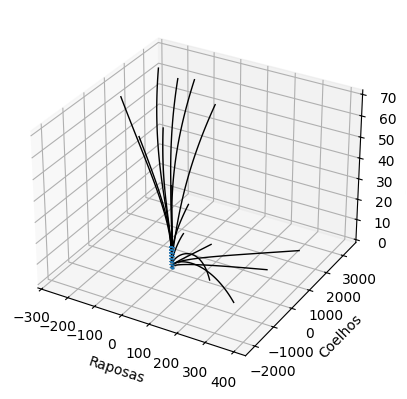

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# Definir o intervalo de pontos
x = np.linspace(0, 10, 8)
y = np.linspace(0, 10, 8)
z = np.linspace(0, 10, 8)

# Criar uma grade de pontos
X, Y, Z = np.meshgrid(x, y, z)

# Funções para calcular os componentes dos vetores
def vector_field(r, t):
    x, y, z = r
    dxdt = 2 * x - z
    dydt = 3 * y - x
    dzdt = z
    return [dxdt, dydt, dzdt]

# Função para gerar linhas de fluxo
def generate_streamlines(x_start, y_start, z_start, t_max=2, num_points=100):
    initial_conditions = [x_start, y_start, z_start]
    t = np.linspace(0, t_max, num_points)
    solution = odeint(vector_field, initial_conditions, t)
    return solution

# Plotar o campo vetorial com linhas de fluxo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar o quiver para desenhar os vetores
ax.quiver(X, Y, Z, 2*X - Z, 3*Y - X, Z, length=0.5, normalize=True)

# Gerar e plotar mais linhas de fluxo
num_lines = 15  # Número de linhas de fluxo
for i in range(num_lines):  
    # Seleciona pontos iniciais de forma mais controlada
    x_start = np.random.uniform(0, 10)
    y_start = np.random.uniform(0, 10)
    z_start = np.random.uniform(0, 10)
    
    # Gerar a linha de fluxo
    stream = generate_streamlines(x_start, y_start, z_start)
    
    # Plotar a linha de fluxo
    ax.plot(stream[:, 0], stream[:, 1], stream[:, 2], color='black', lw=1)

# Definir rótulos
ax.set_xlabel('Raposas')
ax.set_ylabel('Coelhos')
ax.set_zlabel('Caçadores')

# Exibir o gráfico
plt.show()


Agora utilzando a mesma ideia para encontrar em quais pontos temos o equilíbrio das populações, ou seja, as proporções de raposas, coelhos e caçadores se mantêm, utilizamos os autovalores e autovetores da matriz que representa a variação do sistema linear, que é dado por:
$$ 
\begin{pmatrix} R' \\ C' \\ H'\end{pmatrix} = \begin{pmatrix} 2 & 0 & -1 \\ -1 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} R \\ C \\ H \end{pmatrix}
$$

In [13]:
# Definindo a matriz
A = np.array([[2, 0, -1], [-1, 3, 0], [0, 0, 1]])

# Calculando os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

# Exibindo os resultados
print("Autovalores:", autovalores)
print("Autovetores:")
print(autovetores)

Autovalores: [3. 2. 1.]
Autovetores:
[[0.         0.70710678 0.66666667]
 [1.         0.70710678 0.33333333]
 [0.         0.         0.66666667]]


Percebemos que os três autovalores são 3, 2 e 1, ou seja, quando a população inicial é um múltiplo do autovetor $\mathbf{v_1}$, os valores são multiplicados por 3, quando a população inicial é um múltiplo do vetor $\mathbf{v_2}$, a população é multiplicada por 2 e quando a população inicial é um múltiplo do vetor $\mathbf{v_3}$, a população é multiplicada por 1. Em todos os casos, o equilíbrio do sistema é mantido. Podemos plotar as três linhas nas direções desses 3 autovetores:


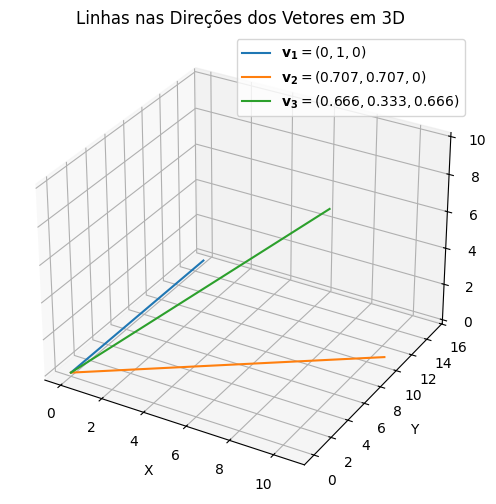

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo o intervalo para a linha
t = np.linspace(0, 15, 100)  # Linha que vai de 0 a 15

# Vetores diretores fornecidos
v1 = np.array([0, 1, 0])
v2 = np.array([0.70710678, 0.70710678, 0])
v3 = np.array([0.66666667, 0.33333333, 0.66666667])

# Criando as linhas a partir de (0,0,0)
linha1 = np.outer(t, v1)  # Multiplicando para estender a linha
linha2 = np.outer(t, v2)  # Multiplicando para estender a linha
linha3 = np.outer(t, v3)  # Multiplicando para estender a linha

# Plotando em 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotando as linhas nas direções dos vetores
ax.plot(linha1[:, 0], linha1[:, 1], linha1[:, 2], label=r'$\mathbf{v_1} = (0, 1, 0)$')
ax.plot(linha2[:, 0], linha2[:, 1], linha2[:, 2], label=r'$\mathbf{v_2} = (0.707, 0.707, 0)$')
ax.plot(linha3[:, 0], linha3[:, 1], linha3[:, 2], label=r'$\mathbf{v_3} = (0.666, 0.333, 0.666)$')

# Definindo rótulos e limites
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Exibindo rótulos, título e legenda
ax.legend()
ax.set_title('Linhas nas Direções dos Vetores em 3D')

# Exibindo o gráfico
plt.show()


Valores de populações que iniciam em pontos dessas três retas manterão a mesma proporção, sem nenhuma população se sobressair sobre outra. A divisão em regiões do espaço fica mais difícil de ser visualizada nesse caso, mas existem 3 subespaços nos quais a população de raposas cresce mais rapidamente, a população de coelhos cresce mais rapidamente e a população de caçadores cresce mais rapidamente.